In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [61]:
pd.options.display.float_format = '{:,.10f}'.format

In [2]:
sensors_df = pd.read_csv('SCOOT/data_470_hourly/locations.csv')
sensors_list = sensors_df.id.tolist()

### 1.Plot the statistical distribution of hourly traffic flow 

In [3]:
sensor_df_list = []
for sensor in sensors_list:
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    sensor_df = sensor_df[['time','flow']]
    sensor_df_list.append(sensor_df)
df_plot = pd.concat(sensor_df_list, ignore_index=True, sort=False)
df_plot

time  flow
0            0     6
1            1     4
2            2     4
3            3     0
4            4     4
...        ...   ...
15812313    19    80
15812314    20    75
15812315    21    75
15812316    22    67
15812317    23     4

[15812318 rows x 2 columns]

#### Plot via seaborn

Text(0, 0.5, 'Flow/h')

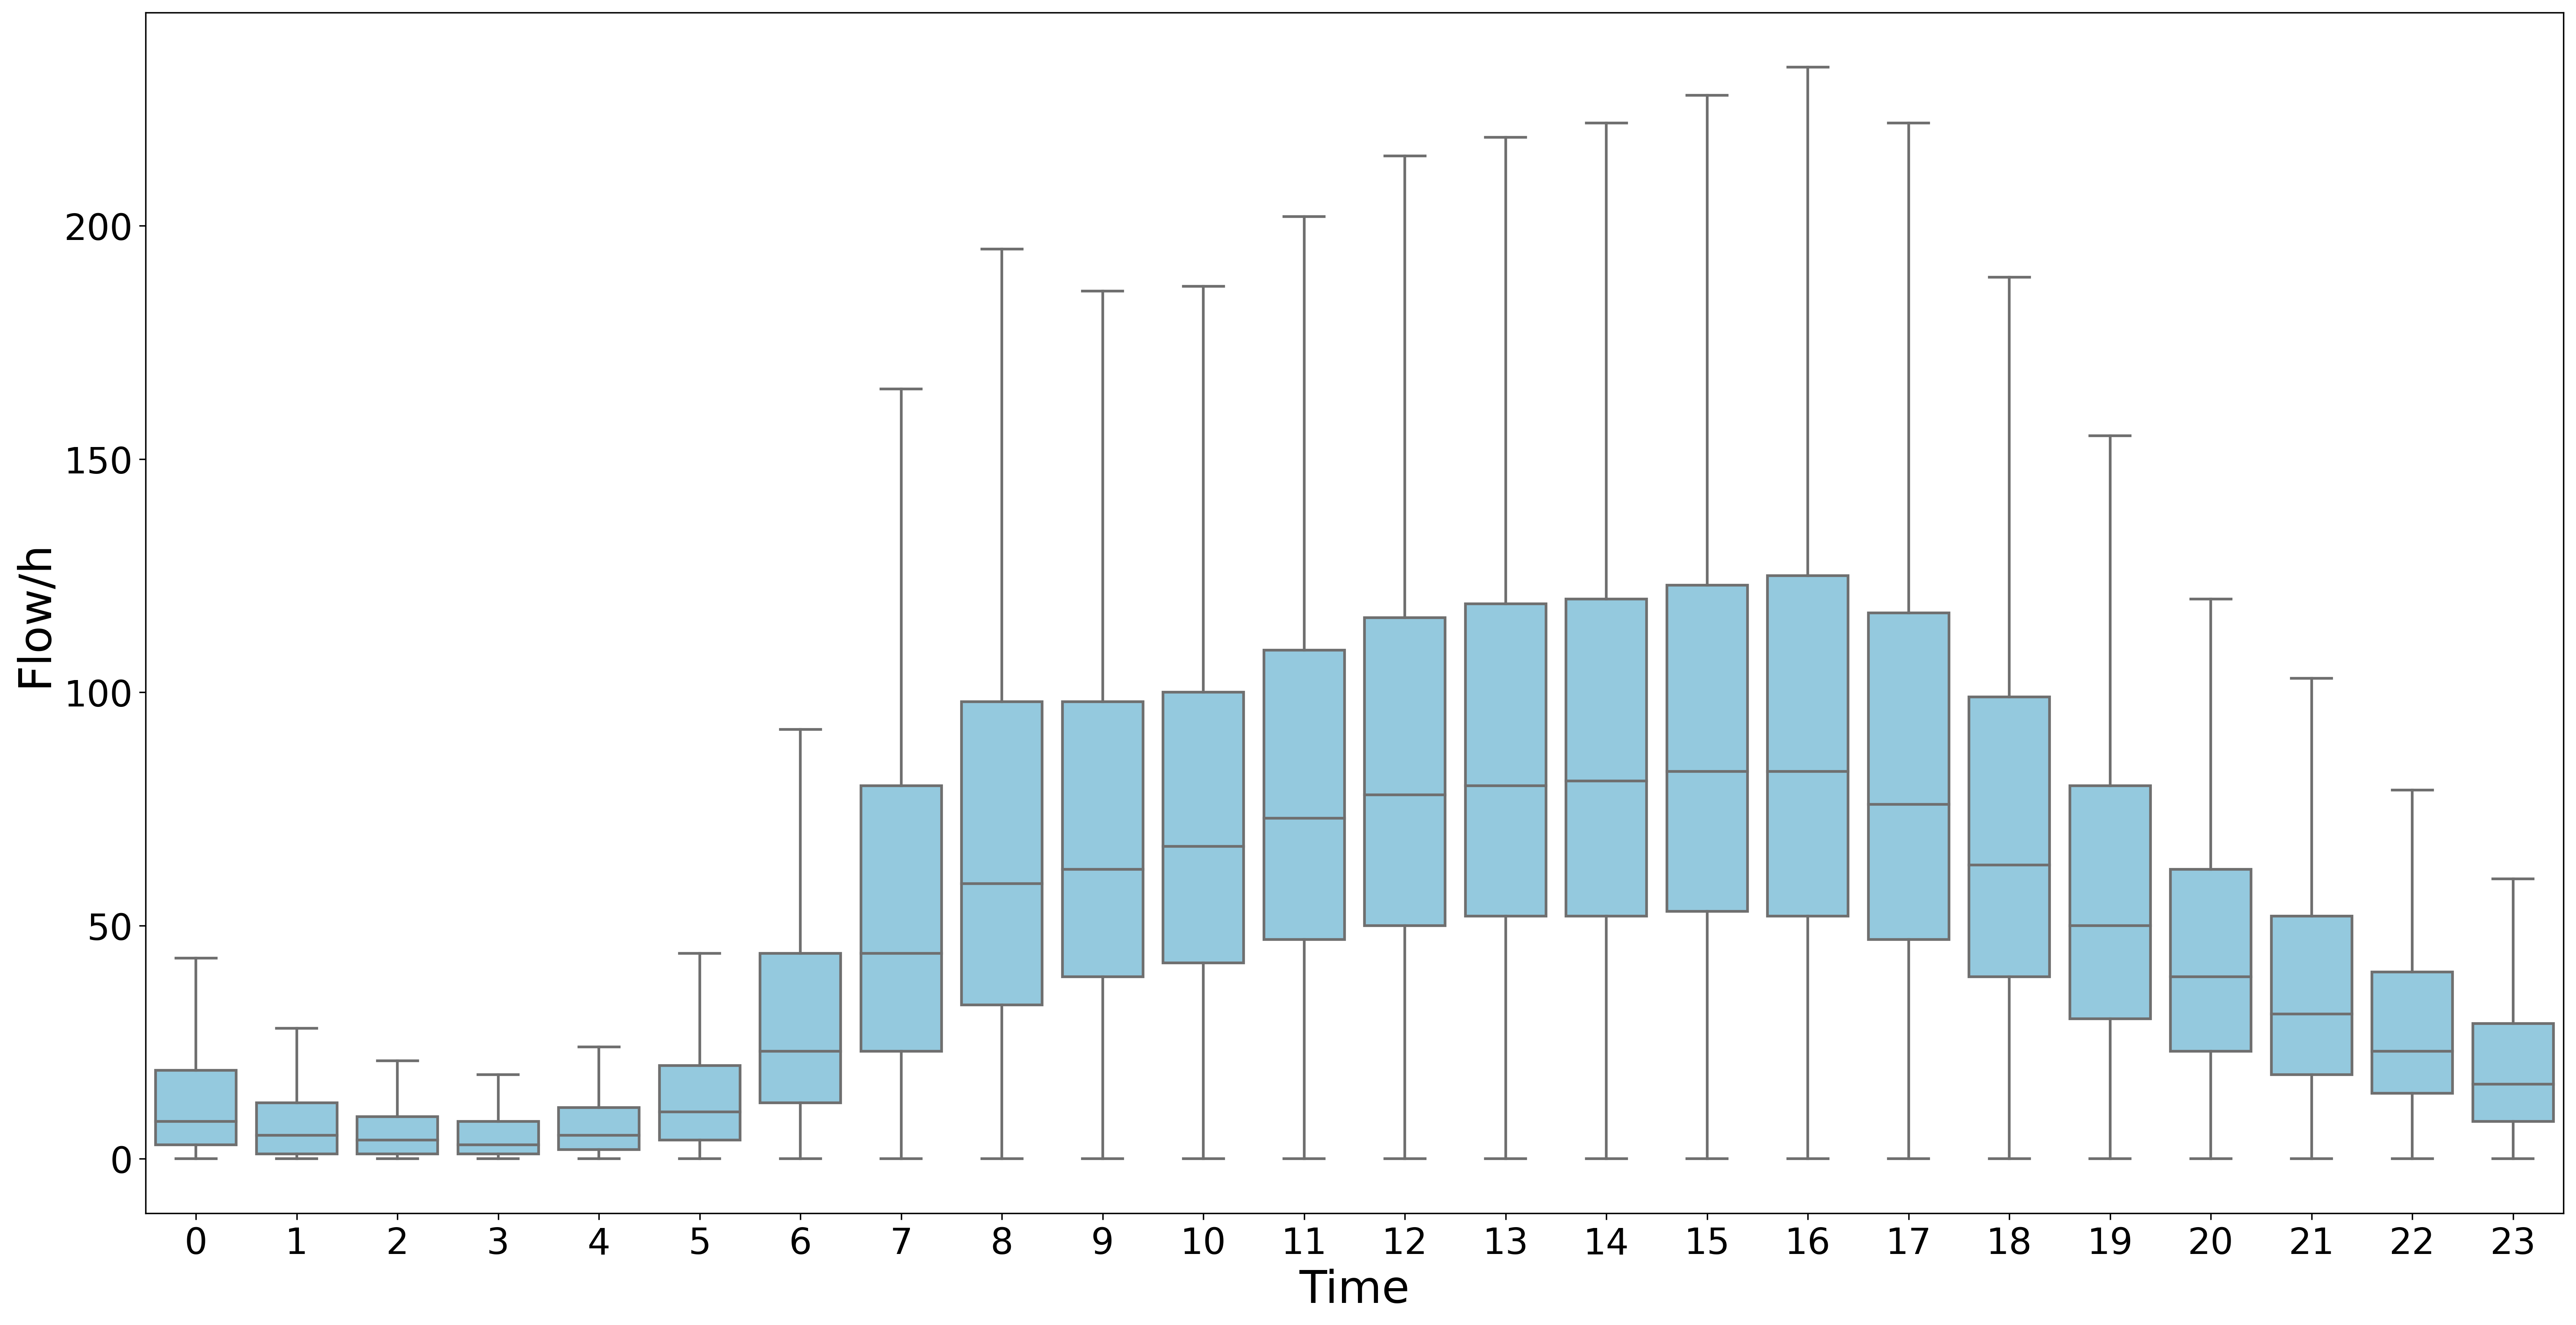

In [13]:
fig = plt.figure(figsize=(24, 12), dpi=300)
sns.boxplot(data=df_plot, x='time', y='flow', color='skyblue',showfliers=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time',fontsize=25)
plt.ylabel('Flow/h',fontsize=25)
#fig.savefig('../../../publication/from Yue/Data paper/figure/boxplot.png')

#### Plot via pandas

Text(0.5, 1.0, '')

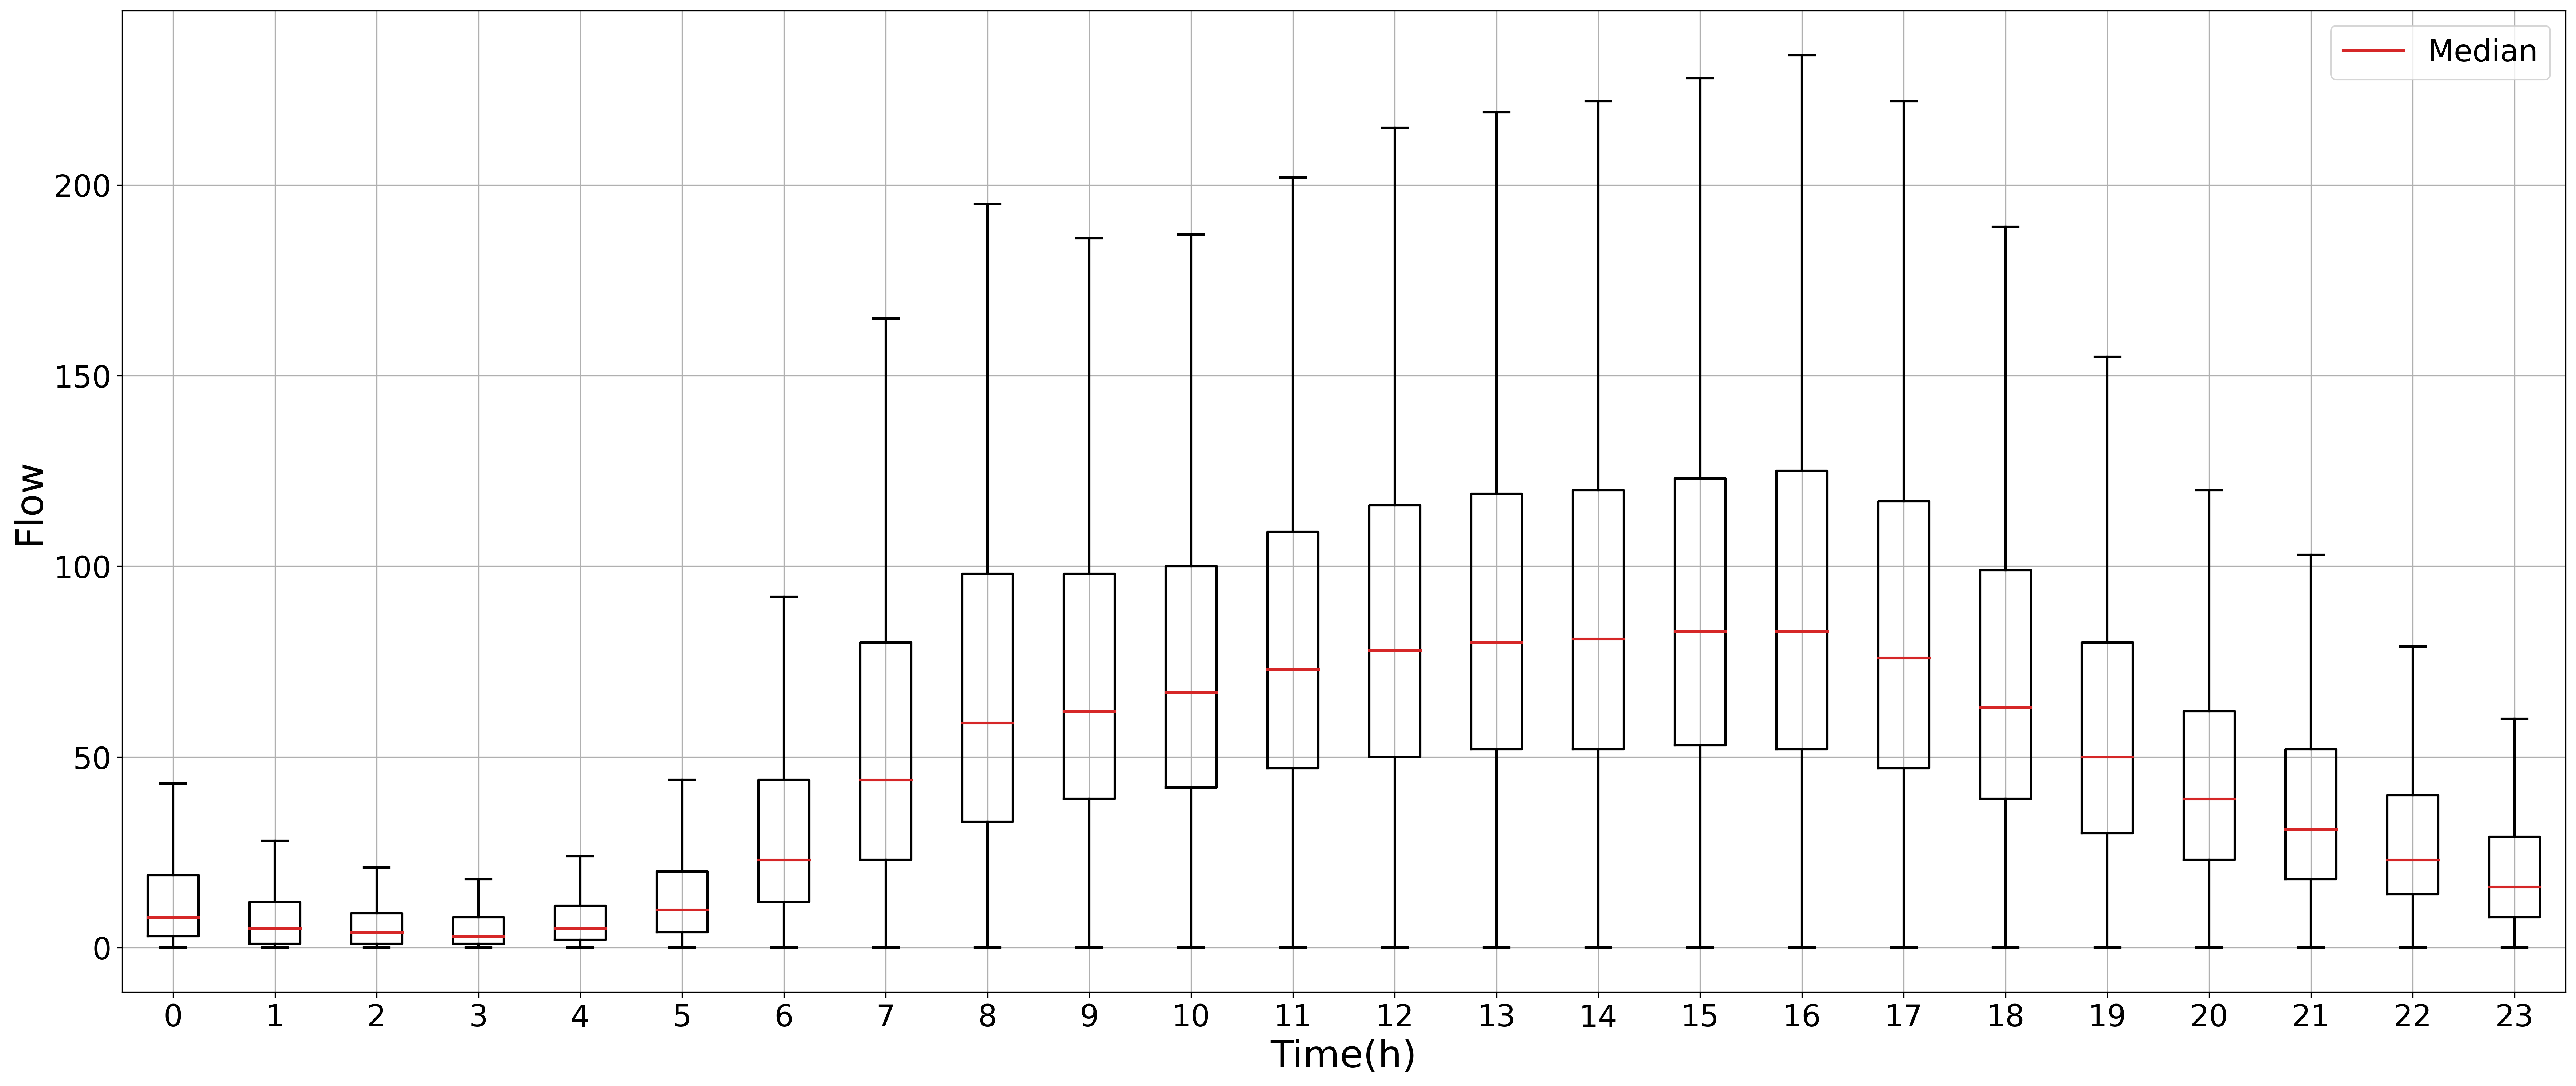

In [16]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [28, 12]

boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops=dict(color="tab:red", linewidth=1.7)

df_plot.boxplot(by ='time', column =['flow'], showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)



plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time(h)',fontsize=25)
plt.ylabel('Flow',fontsize=25)
#plot legend
plt.plot([], [], '-', linewidth=1.7, color='tab:red', label='Median')
plt.legend(fontsize=20)
# do not show the title and subtitle
plt.suptitle('')
plt.title('')
#plt.savefig('../../../publication/from Yue/Data paper/figure/boxplot_2.png')

### 2.Plot the hourly zero frequency

#### Get the zero frequency of each sensor

In [20]:
def get_zero_frequency(sensor): 
    
    data = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    zero_time = data.loc[data.flow == 0, 'time'].tolist()
    zero_time_frequency = dict(sorted((dict(Counter(zero_time))).items()))
    df_zero = pd.DataFrame([zero_time_frequency])
    df_zero.insert(loc=0, column='siteId', value=sensor)
    
    return df_zero

In [21]:
sensor_df_ls = []
for sensor in sensors_list:
    sensor_df = get_zero_frequency(sensor)
    sensor_df_ls.append(sensor_df)
zero_df = pd.concat(sensor_df_ls)#.reset_index(drop=True)
zero_df = zero_df.fillna(0)
#convert float to int
#pd.options.display.float_format = '{:,.0f}'.format
zero_df

siteId      0      1      2    3      4      5      6     7     8  ...  \
0   GA0151_A   48.0   94.0  139.0  183  153.0   68.0   26.0   2.0   1.0  ...   
0   GA0151_C    4.0   18.0   46.0   50   29.0    6.0    0.0   1.0   1.0  ...   
0   GA0151_D    8.0   18.0   32.0   51   55.0   18.0    0.0   1.0   1.0  ...   
0   GA0401_R  262.0  338.0  420.0  454  304.0  151.0   47.0   4.0   1.0  ...   
0   GA0401_S   21.0   37.0   58.0   76   37.0    6.0    2.0   1.0   1.0  ...   
..       ...    ...    ...    ...  ...    ...    ...    ...   ...   ...  ...   
0   GL3551_R    2.0   16.0   42.0   28    8.0    2.0    1.0   1.0   0.0  ...   
0   GL3551_S   44.0   74.0  109.0  110   74.0    4.0    2.0   1.0   0.0  ...   
0   GL3551_T   27.0   63.0   98.0   78   23.0    2.0    1.0   1.0   0.0  ...   
0   GL4151_B  782.0  898.0  986.0  985  776.0  315.0   39.0  10.0   6.0  ...   
0   GL4151_C  834.0  850.0  913.0  903  679.0  466.0  150.0  17.0  13.0  ...   

     14    15    16    17    18    19    20     21     22     23  
0   5.0   5.0   5.0   5.0   4.0   4.0   3.0    3.0    7.0   11.0  
0   5.0   5.0   5.0   5.0   4.0   4.0   3.0    3.0    3.0    1.0  
0   5.0   5.0   5.0   5.0   4.0   4.0   3.0    3.0    3.0    1.0  
0   3.0   4.0   7.0   4.0   4.0   5.0   6.0    3.0    6.0  101.0  
0   2.0   2.0   2.0   2.0   1.0   1.0   1.0    1.0    1.0    1.0  
..  ...   ...   ...   ...   ...   ...   ...    ...    ...    ...  
0   0.0   1.0   2.0   2.0   2.0   2.0   1.0    1.0    1.0    1.0  
0   0.0   1.0   2.0   2.0   2.0   2.0   1.0    1.0    1.0    8.0  
0   0.0   1.0   2.0   2.0   2.0   2.0   1.0    1.0    1.0    1.0  
0   5.0   7.0   8.0   8.0   7.0  40.0  78.0  144.0  228.0  562.0  
0   5.0  10.0  11.0  14.0  14.0  10.0  37.0  112.0  128.0  490.0  

[470 rows x 25 columns]

#### Transpose and reconstruct the dataframe for plot

In [22]:
zero_T = zero_df.T
zero_T_nosite = zero_T.iloc[1:]
sites = zero_T.iloc[0:1]
sites = pd.concat([sites]*24)
#Reconstruct the column of sensors and zero frequency 
new_zero = pd.concat([zero_T_nosite.iloc[:,i:i+1] for i in range(0,zero_T_nosite.shape[1],1)]).reset_index()
new_sites = pd.concat([sites.iloc[:,i:i+1] for i in range(0,sites.shape[1],1)]).reset_index(drop=True)
zero_plot = pd.concat([new_sites, new_zero],axis=1, ignore_index=True)
zero_plot.rename(columns={0: 'siteId', 1: 'time', 2: 'zero_frequency'}, inplace=True)
zero_plot['zero_frequency'] = zero_plot['zero_frequency'].astype(str).astype(float)
zero_plot

siteId  time  zero_frequency
0      GA0151_A     0            48.0
1      GA0151_A     1            94.0
2      GA0151_A     2           139.0
3      GA0151_A     3           183.0
4      GA0151_A     4           153.0
...         ...   ...             ...
11275  GL4151_C    19            10.0
11276  GL4151_C    20            37.0
11277  GL4151_C    21           112.0
11278  GL4151_C    22           128.0
11279  GL4151_C    23           490.0

[11280 rows x 3 columns]

#### Box plot via pandas

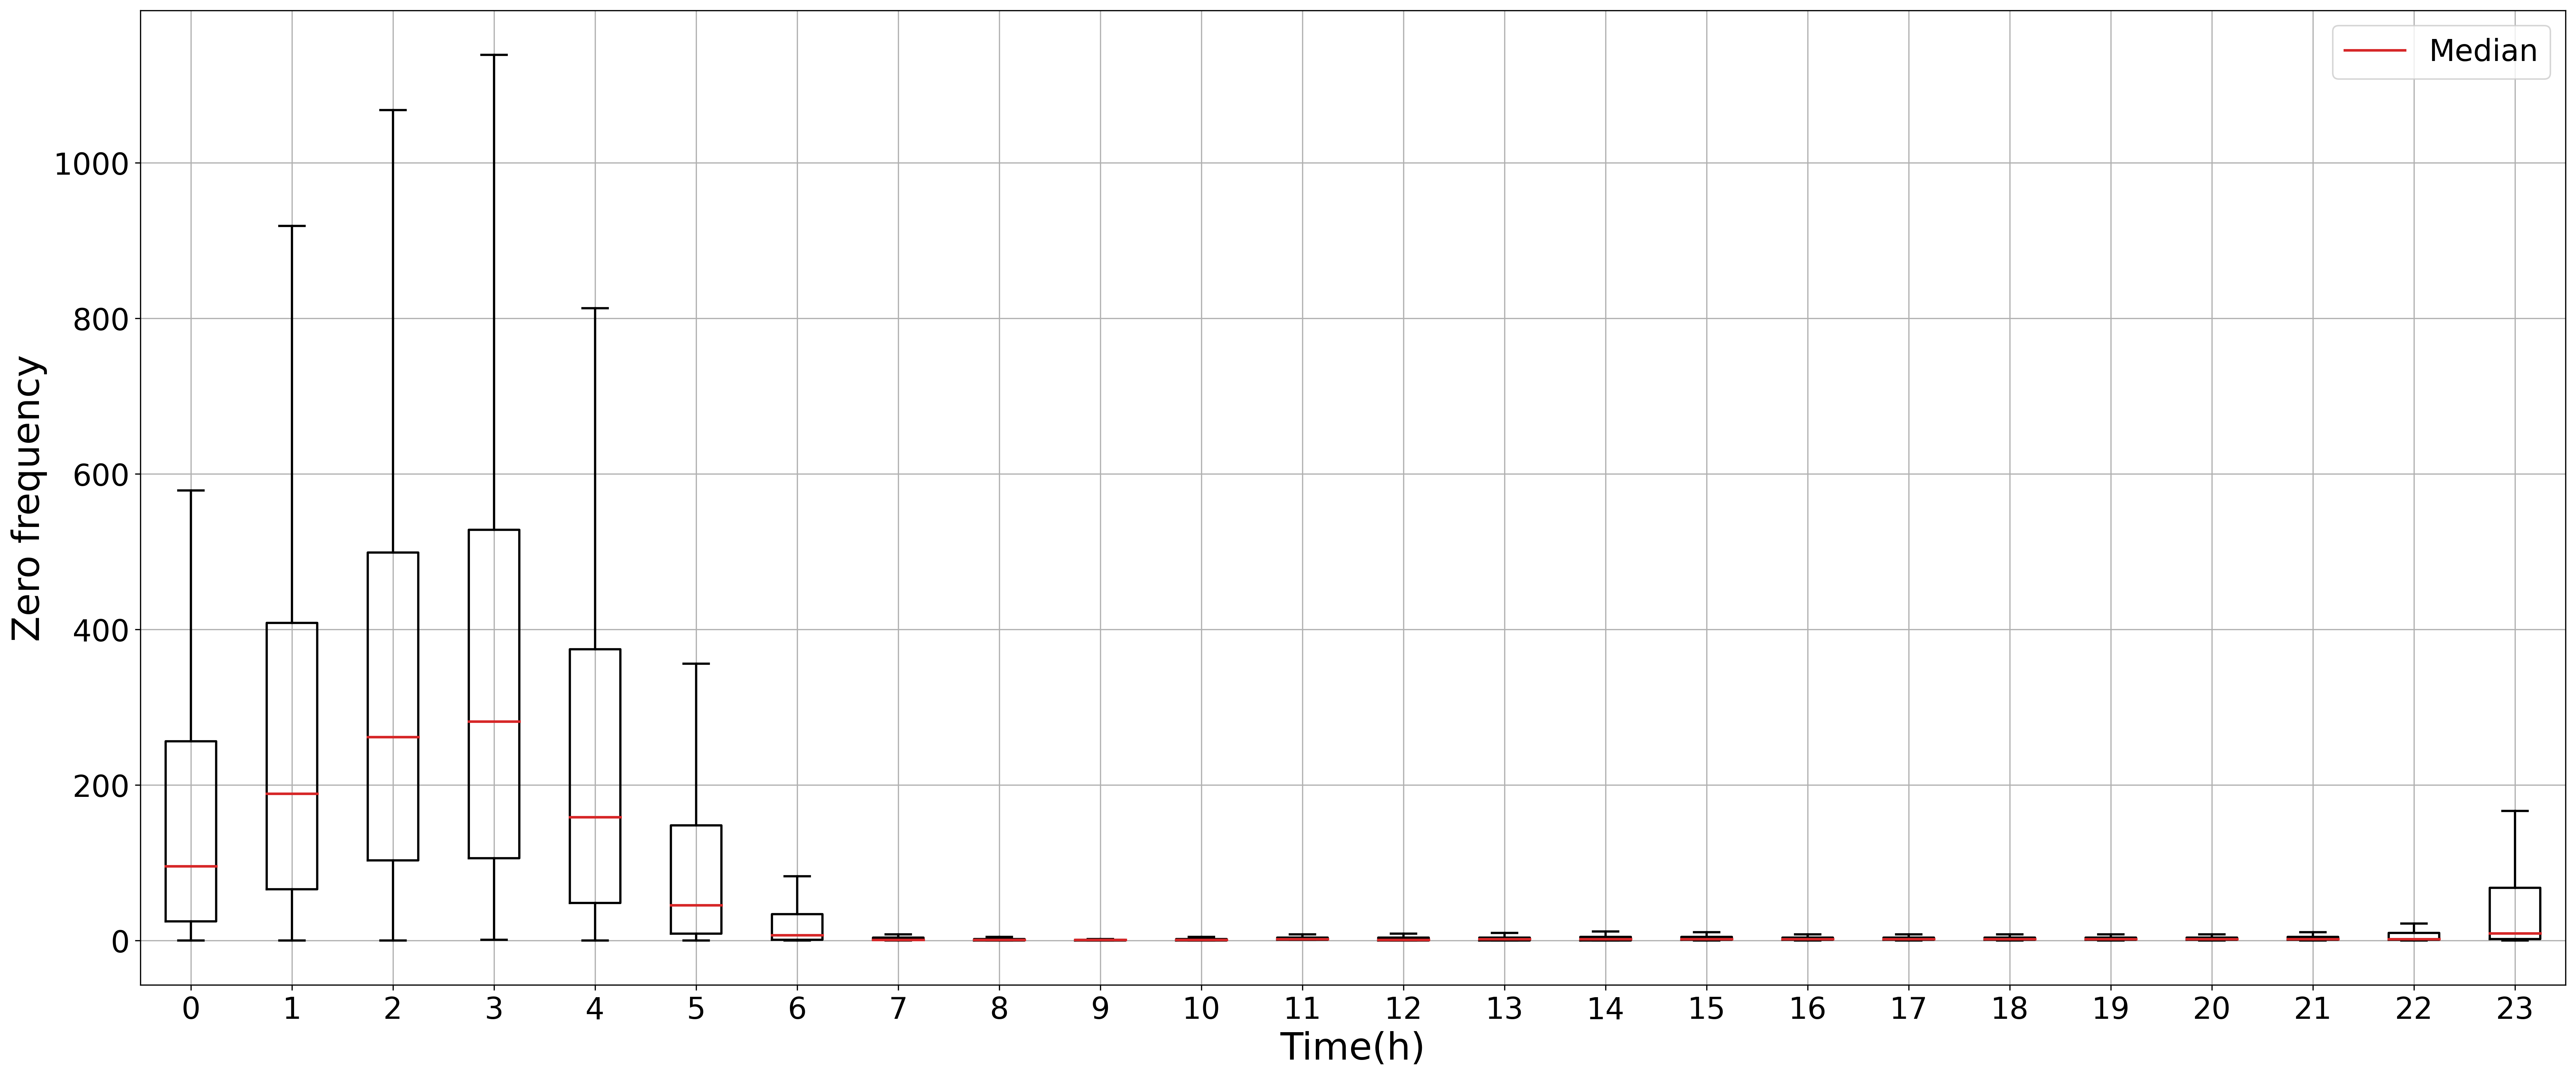

In [20]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [28, 12]

boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops=dict(color='tab:red', linewidth=1.7)

zero_plot.boxplot(by ='time', column =['zero_frequency'], showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)



plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time(h)',fontsize=25)
plt.ylabel('Zero frequency',fontsize=25)
plt.plot([], [], '-', linewidth=1.7, color='tab:red', label='Median')
plt.legend(fontsize=20)
# do not show the title and subtitle
plt.suptitle('')
plt.title('')
plt.savefig('../../../publication/from Yue/Data paper/figure/box_zero_freq.png')

#### Correlation between traffic flow and zero frequency

In [41]:
from scipy.stats import pearsonr, spearmanr
mean_df = df_plot.groupby(['time']).mean()
mean_zero = zero_plot[['time','zero_frequency']].groupby(['time']).mean()

mean_s_corr = spearmanr(mean_df['flow'], mean_zero['zero_frequency'])[0]
mean_p_corr = pearsonr(mean_df['flow'], mean_zero['zero_frequency'])[0]
mean_s_corr_p = spearmanr(mean_df['flow'], mean_zero['zero_frequency'])[1]
mean_p_corr_p = pearsonr(mean_df['flow'], mean_zero['zero_frequency'])[1]

pd.DataFrame([[mean_p_corr, mean_p_corr_p], [mean_s_corr, mean_s_corr_p]], index=["Pearson", "Spearman"], columns=["coefficient", "p_value"])

coefficient       p_value
Pearson     -0.803170  2.306328e-06
Spearman    -0.907826  9.133169e-10

#### Heatmap for 4 years

### 3.Plot spatial distribution of hourly traffic flow by road link (not useful for visualisation)

#### Find the closest road of each sensor

In [67]:
road_link = gpd.read_file('../Glasgow_road_link-shp/road_link_shp/20211110_glasgow_road_link.shp')
road_link = road_link[['TOID','roadClassi','routeHiera','formOfWay','SHAPE_Leng', 'geometry']]

sensors_df["geometry"] = gpd.points_from_xy(sensors_df["longitude"], sensors_df["latitude"])
# set coordinates to WGS84
sensors_df = gpd.GeoDataFrame(sensors_df, crs="epsg:4326")

sensors_df = sensors_df.to_crs("32630")
road_df = road_link.to_crs("32630")

In [81]:
sensor_road = gpd.sjoin_nearest(sensors_df, road_df, how='left', distance_col="distances")
sensor_road = sensor_road[['id','TOID','distances']]
sensor_road

id                  TOID    distances
0    GA0151_A  osgb4000000005153397 8.0032996039
1    GA0151_C  osgb4000000005153071 1.1686666079
2    GA0151_D  osgb4000000005153015 1.3933230235
3    GA0401_R  osgb4000000005153454 1.5244695079
4    GA0401_S  osgb4000000005376915 3.1385895572
..        ...                   ...          ...
465  GL3551_R  osgb4000000005140020 0.3024529652
466  GL3551_S  osgb4000000005140299 0.0552496619
467  GL3551_T  osgb4000000005139998 1.7510949982
468  GL4151_B  osgb5000005159032219 1.7615128488
469  GL4151_C  osgb5000005154166906 1.5263737523

[470 rows x 3 columns]

#### Get the hourly flow(2023-09-30,12) of each sensor 

In [103]:
for sensor in sensors_list:
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    flow = sensor_df.loc[sensor_df.date == '2023-09-30'].loc[sensor_df.time == 12,'flow'].item()
    sensor_road.loc[sensor_road.id == sensor, 'flow'] = flow
    
sensor_road

id                  TOID    distances           flow
0    GA0151_A  osgb4000000005153397 8.0032996039  44.0000000000
1    GA0151_C  osgb4000000005153071 1.1686666079 204.0000000000
2    GA0151_D  osgb4000000005153015 1.3933230235 148.0000000000
3    GA0401_R  osgb4000000005153454 1.5244695079  30.0000000000
4    GA0401_S  osgb4000000005376915 3.1385895572 122.0000000000
..        ...                   ...          ...            ...
465  GL3551_R  osgb4000000005140020 0.3024529652 268.0000000000
466  GL3551_S  osgb4000000005140299 0.0552496619 127.0000000000
467  GL3551_T  osgb4000000005139998 1.7510949982 155.0000000000
468  GL4151_B  osgb5000005159032219 1.7615128488  21.0000000000
469  GL4151_C  osgb5000005154166906 1.5263737523  53.0000000000

[470 rows x 4 columns]

In [104]:
road_sensor_df = pd.merge(road_df, sensor_road, how="left", on="TOID")
road_sensor_df = road_sensor_df.fillna(0)

In [111]:
road_sensor_flow = road_sensor_df.to_crs("27700")
#road_sensor_flow.to_file('../../../publication/from Yue/Data paper/map/Myproject4 (1)/road_sensor_flow_hourly.shp', driver='ESRI Shapefile')

### 4. Make the statistical plot of daily traffic flow for whole study period 

Compare with the stringncy index

#### 4.1 Calculate the daily traffic flow of each sensor

In [3]:
def read_csv(sensor):
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    return sensor_df

In [4]:
def get_daily_flow(sensor_df):
    sensor_daily = sensor_df.groupby("date", as_index=False).agg( {'flow':lambda x: x.mean()*24})
    sensor_daily.date =pd.to_datetime(sensor_daily.date)
    sensor_daily.flow = sensor_daily.flow.astype(int)    
    return sensor_daily

In [5]:
def get_fulltime_string_list(start,end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    now = start
    string_list = []
    while now <= end:
        string_list.append(now.strftime("%Y-%m-%d"))
        now += timedelta(days=1)
    return string_list

#### A list of all sensor df

In [6]:
# Create a frame for plot
#fig, ax1 = plt.subplots(figsize=(18, 6),dpi=150)

# Full length of date
time_list = get_fulltime_string_list("2019-10-01","2023-09-30")
allTime = pd.DataFrame(time_list, columns=['date'])
allTime.date =pd.to_datetime(allTime.date)

# Read data
sensor_df_list = []
for sensor in sensors_list:
    #print(sensor)
    sensor_df = read_csv(sensor)
    sensor_daily = get_daily_flow(sensor_df)
    sensor_daily.set_index('date', inplace=True)
    
    # Merge the data with full date
    sensor_fulldaily = pd.merge(allTime, sensor_daily, how="left", on=["date"])
    sensor_fulldaily.set_index('date', inplace=True)
    sensor_df_list.append(sensor_fulldaily)
    
    # Make line plot
    #ax1.plot(sensor_fulldaily['flow'], linestyle='-', color='black', alpha=0.03, linewidth=0.5)

# Set x-axis
#ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=5)))

#### 4.2 Plot of mean&median daily traffic flow 

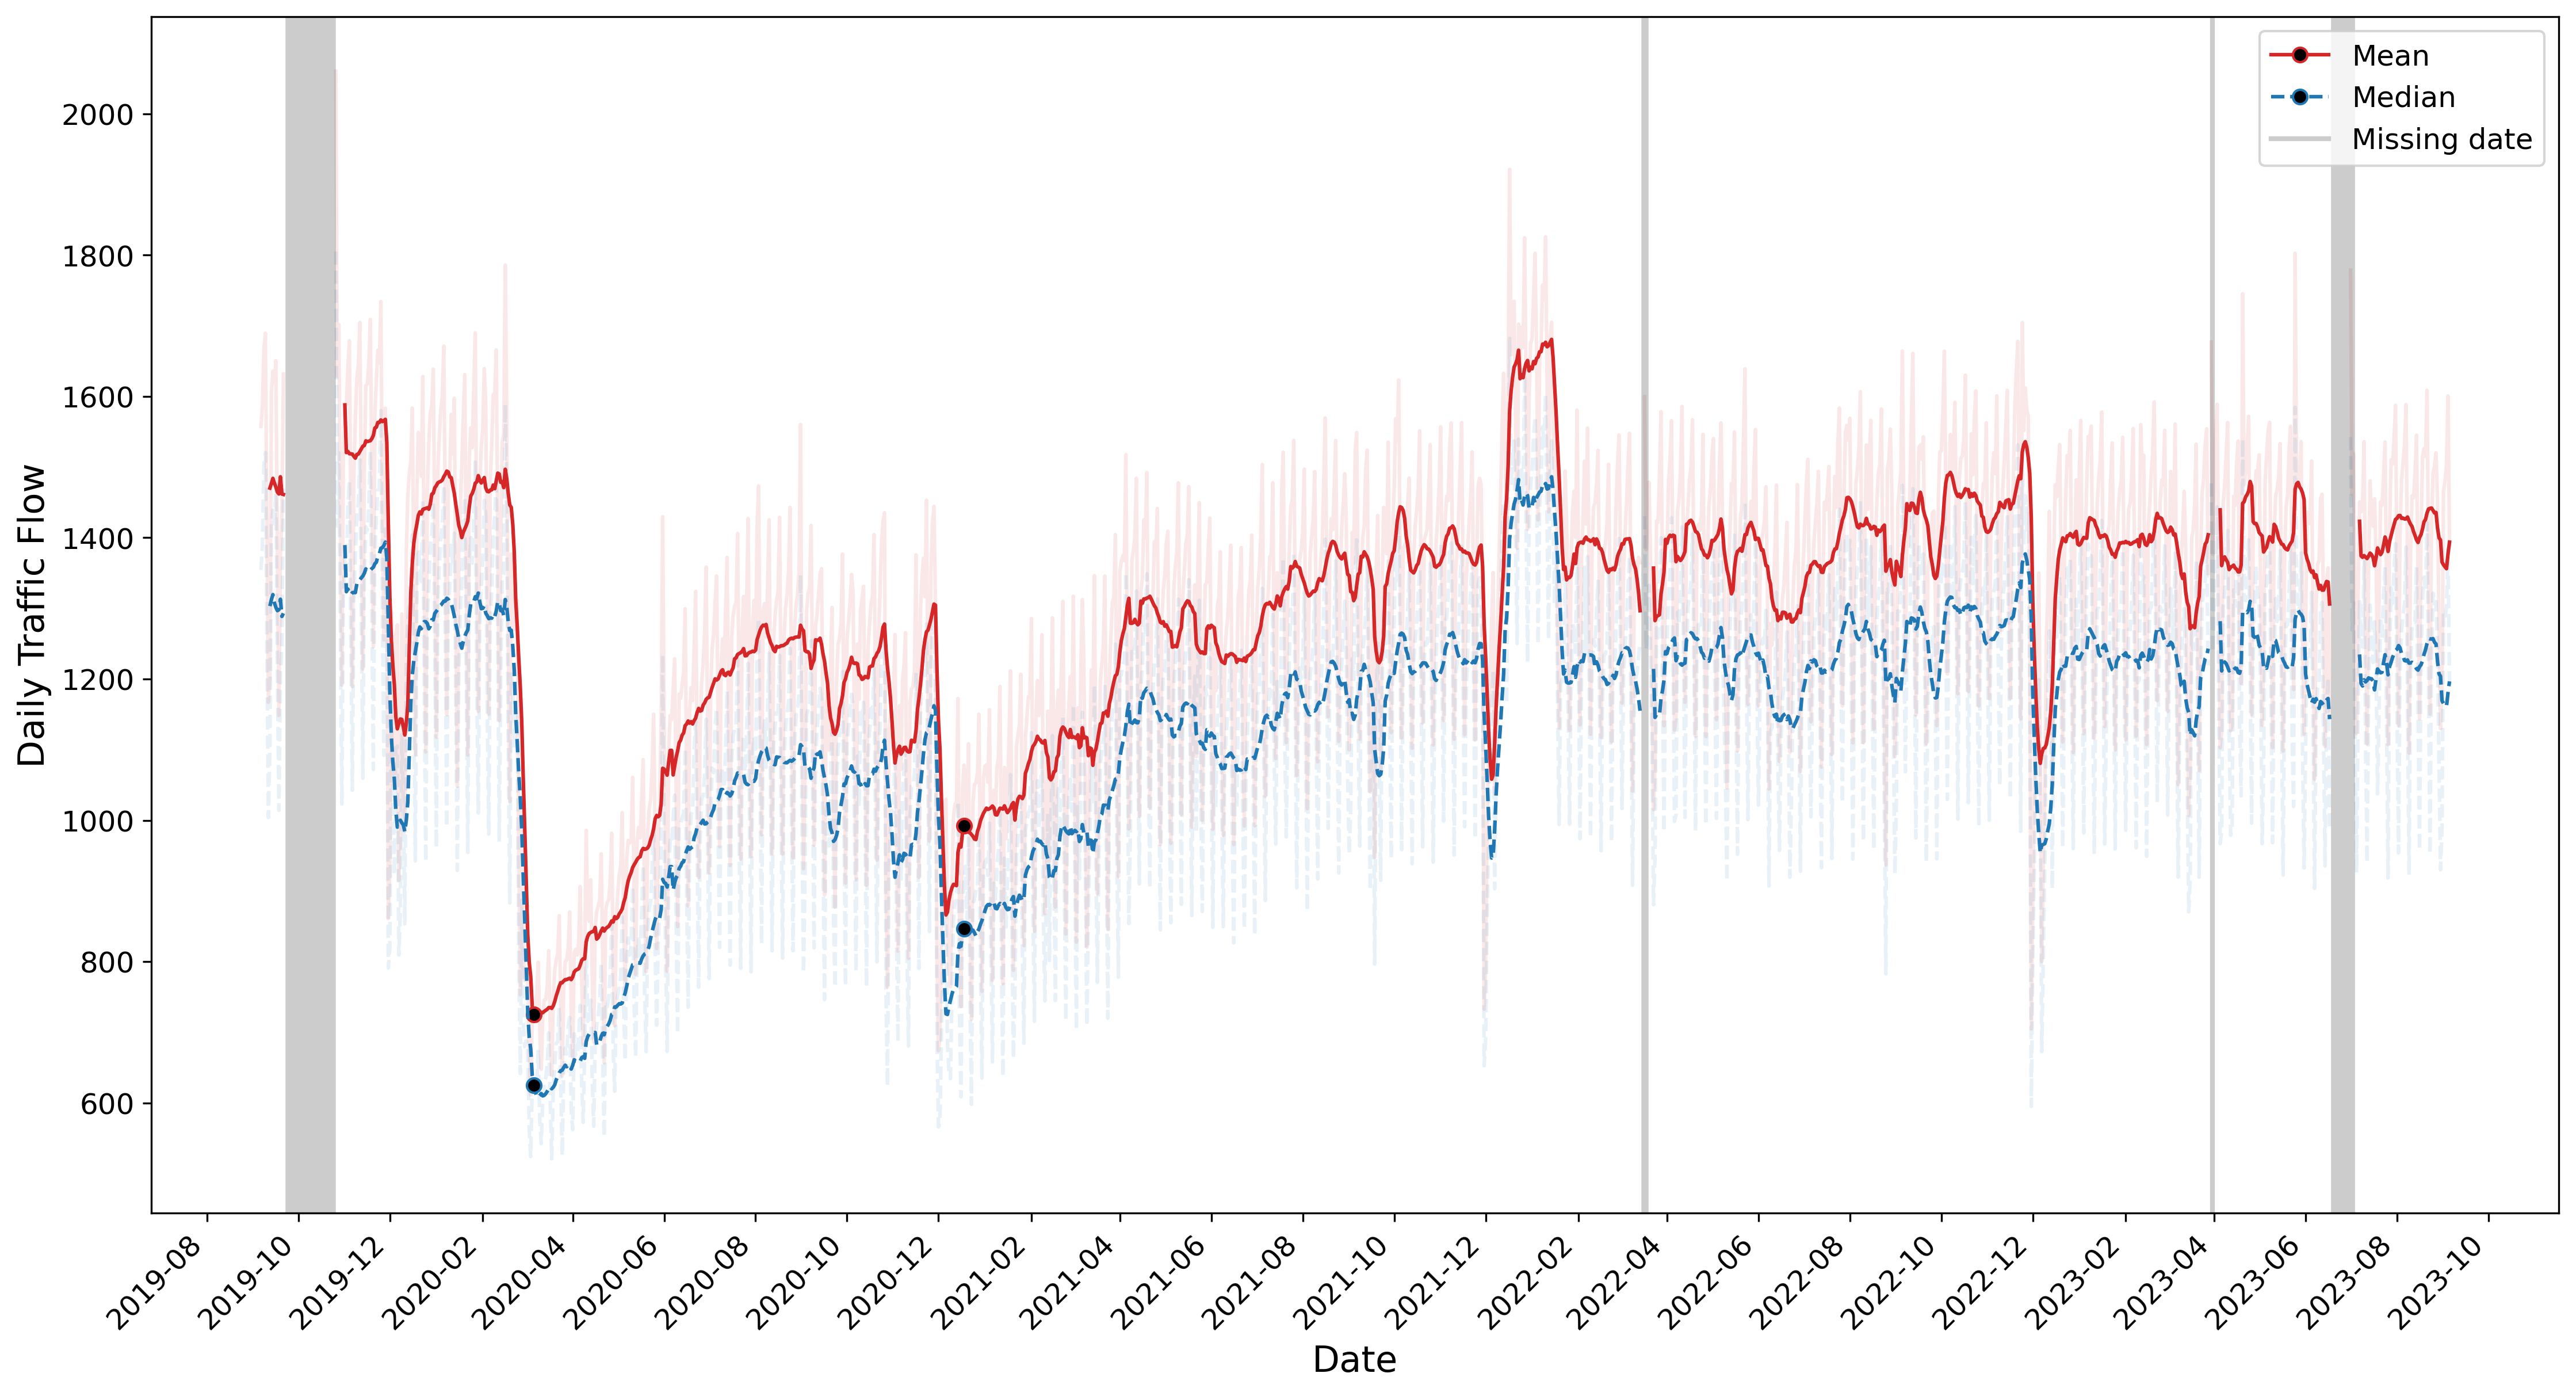

In [7]:
# calculate the mean & median
df_concat = pd.concat(sensor_df_list,axis=1)
df_stas = pd.DataFrame(df_concat.mean(axis=1), columns=['mean'])
df_stas['median'] =  df_concat.median(axis=1)

# Calculate the moving average
df_stas['mean_7'] = df_stas['mean'].rolling(7).mean()
df_stas['median_7'] = df_stas['median'].rolling(7).mean()

# Get the location of lockdown
dates = [datetime(2020, 3, 31),datetime(2021, 1, 12)]
def find_loc(df, dates):
    marks = []
    for date in dates:
        marks.append(df.index.get_loc(date))
    return marks

# Create a frame for plot
fig, ax1 = plt.subplots(figsize=(18, 9),dpi=300)

# Plot
ax1.plot(df_stas['mean'], linestyle='-', color='tab:red', alpha=0.1)
ax1.plot(df_stas['median'], linestyle='--', color='tab:blue', alpha=0.1)

ax1.plot(df_stas['mean_7'], linestyle='-', label='Mean', color='tab:red', alpha=1,
         markevery=find_loc(df_stas, dates), marker='o', markerfacecolor='black')
ax1.plot(df_stas['median_7'], linestyle='--', label='Median', color='tab:blue', alpha=1,
         markevery=find_loc(df_stas, dates), marker='o', markerfacecolor='black')

#2019-10-17 to 2019-11-19 (34d), and 2022-4-9, 2022-4-10, 2023-4-23, and 2023-7-13 to 2023-7-25 (13d)
plt.axvline(datetime(2019, 11, 3), linestyle='-', color='black', alpha=0.2, linewidth=21)
plt.axvline(datetime(2022, 4, 11), linestyle='-', color='black', alpha=0.2, linewidth=3)
plt.axvline(datetime(2023, 4, 25), linestyle='-', label='Missing date', color='black', alpha=0.2, linewidth=2)
plt.axvline(datetime(2023, 7, 21), linestyle='-', color='black', alpha=0.2, linewidth=10)

# Set x-axis
ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=2)))

# show legend and title
lines, labels = ax1.get_legend_handles_labels()
plt.legend(lines, labels, loc='upper right',fontsize=12)

# set x and y label
plt.xlabel('Date',fontsize=15)  # Change the X-axis label to 'Date'
plt.ylabel('Daily Traffic Flow',fontsize=15)

plt.xticks(rotation=45,ha='right',fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('../../../publication/from Yue/Data paper/figure/daily traffic flow.png')

plt.show()

test

In [69]:
sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/GA0571_N.csv')
sensor_daily = sensor_df.groupby("date", as_index=False).agg( {'flow':lambda x: x.mean()*24})
sensor_daily.date =pd.to_datetime(sensor_daily.date)
sensor_daily.flow = sensor_daily.flow.astype(int)
sensor_fulldaily = pd.merge(allTime, sensor_daily, how="left", on=["date"])
sensor_fulldaily.set_index('date', inplace=True)
sensor_fulldaily[sensor_fulldaily.flow > 4000] = np.nan
sensor_fulldaily

flow
date              
2019-10-01  2805.0
2019-10-02  2968.0
2019-10-03  2983.0
2019-10-04  3292.0
2019-10-05  2263.0
...            ...
2023-09-26  2470.0
2023-09-27  2606.0
2023-09-28  2634.0
2023-09-29  2634.0
2023-09-30  2224.0

[1461 rows x 1 columns]

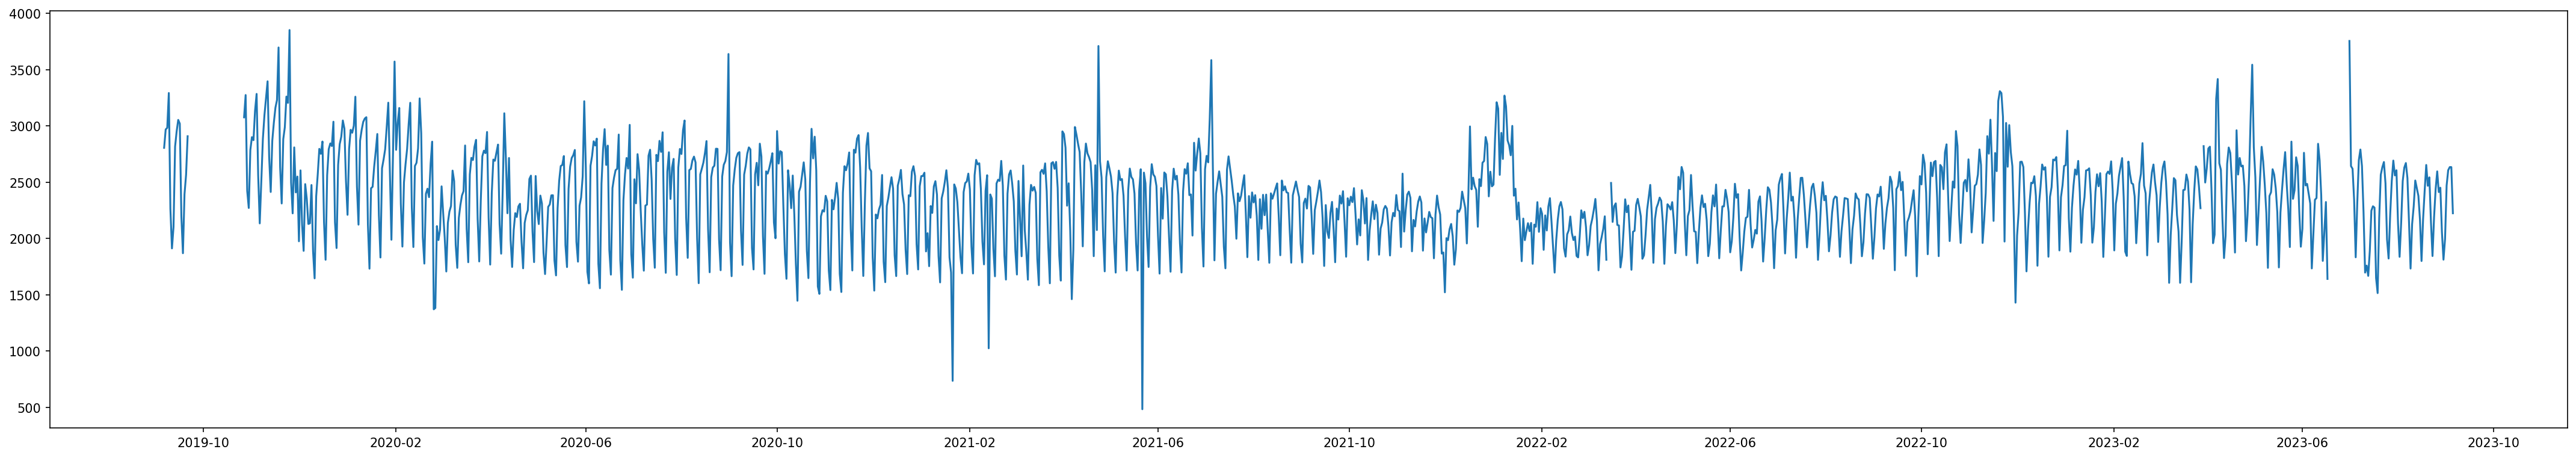

In [35]:
fig, ax1 = plt.subplots(figsize=(36, 6),dpi=150)
ax1.plot(sensor_fulldaily['flow'], linestyle='-', color='tab:blue', alpha=1)
ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=4)))

In [17]:
sensors_list1 = sensors_list[:10]
sensors_list1

['GA0151_A',
 'GA0151_C',
 'GA0151_D',
 'GA0401_R',
 'GA0401_S',
 'GA0401_T',
 'GA0571_N',
 'GA0571_V',
 'GA058A_B',
 'GA058A_C']

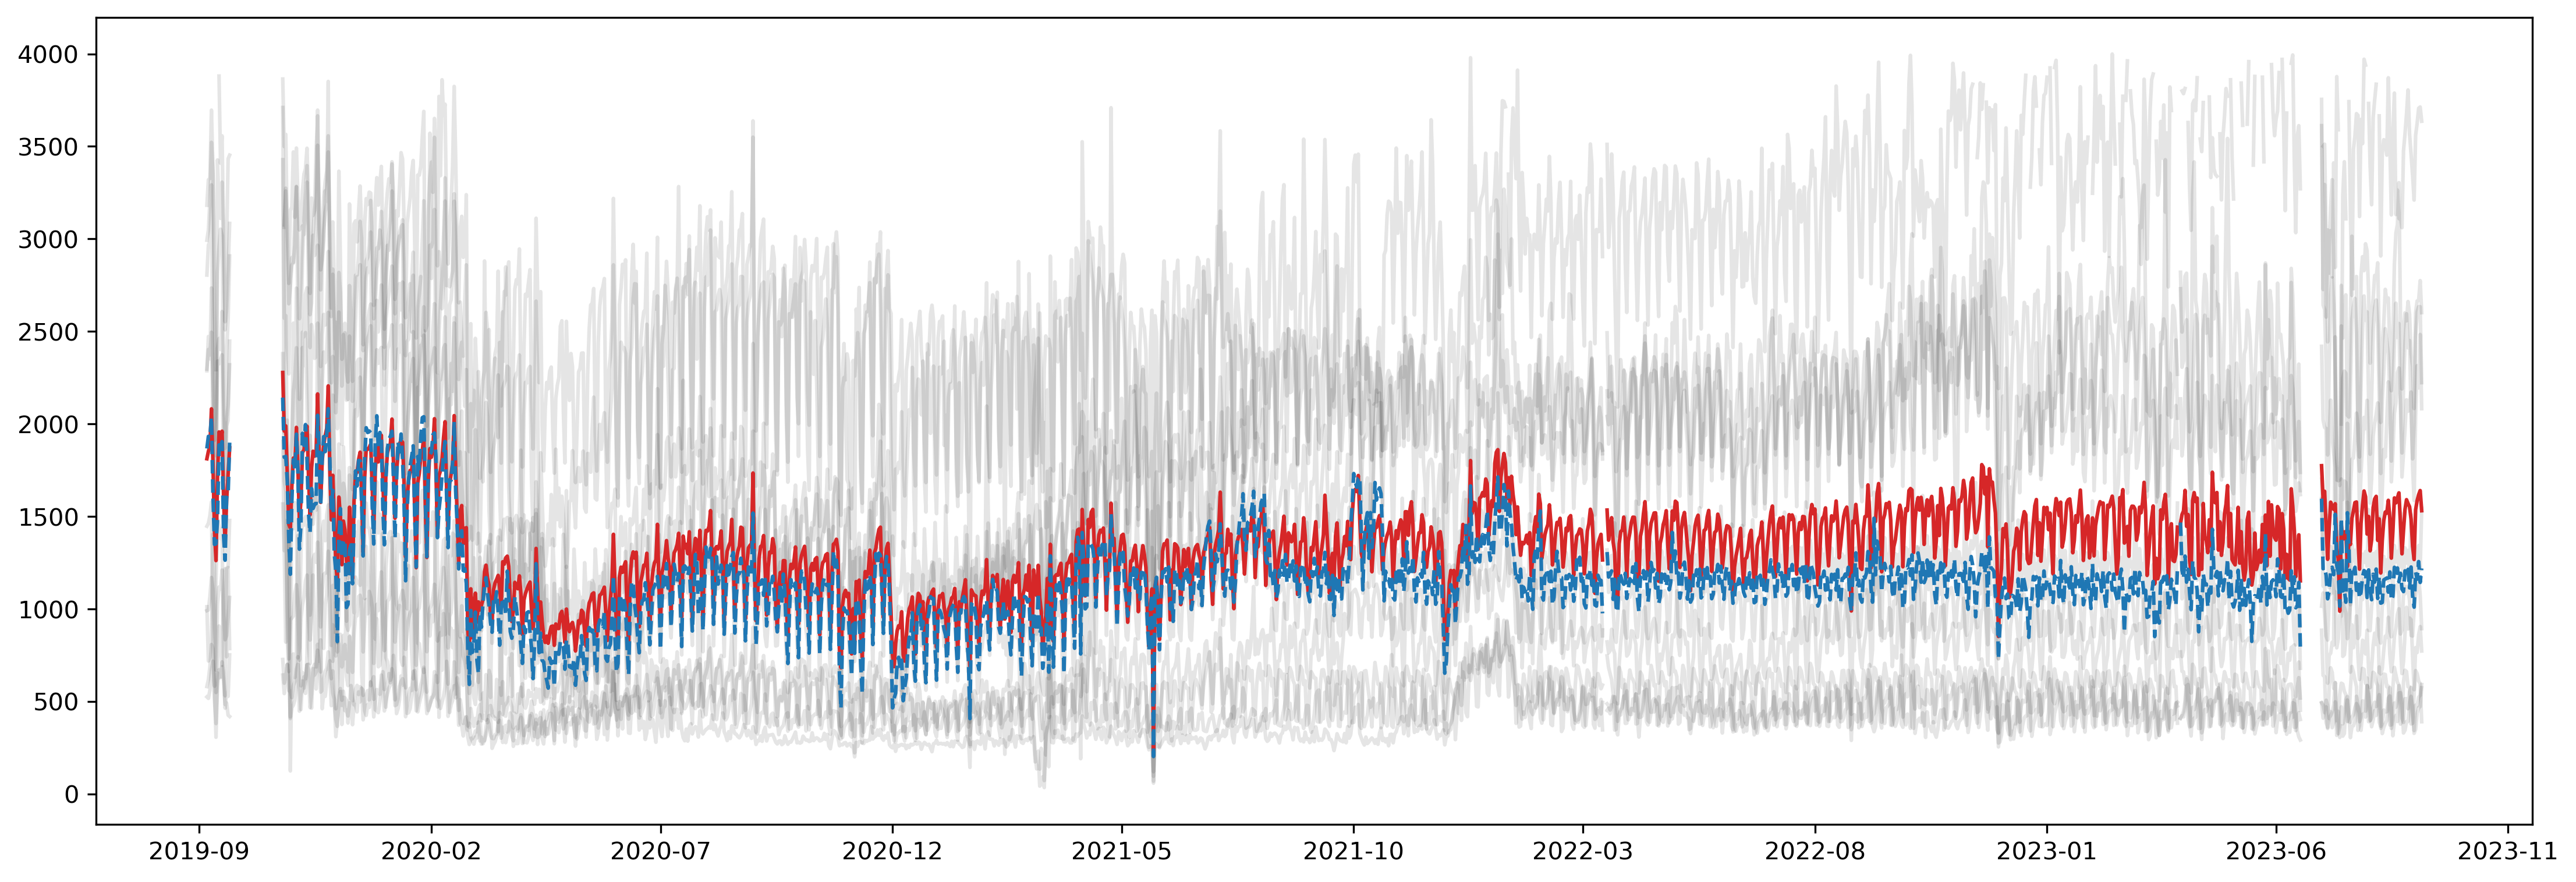

In [33]:
fig, ax1 = plt.subplots(figsize=(18, 6),dpi=300)

sensor_df_list = []
for sensor in sensors_list1:
    sensor_df = read_csv(sensor)
    sensor_daily = get_daily_flow(sensor_df)
    sensor_fulldaily = pd.merge(allTime, sensor_daily, how="left", on=["date"])
    sensor_fulldaily.set_index('date', inplace=True)
    sensor_fulldaily[sensor_fulldaily.flow > 4000] = np.nan
    sensor_df_list.append(sensor_fulldaily)
    
    ax1.plot(sensor_fulldaily['flow'], linestyle='-', color='black', alpha=0.1)
    
# calculate the mean & median
df_concat = pd.concat(sensor_df_list,axis=1)
df_stas = pd.DataFrame(df_concat.mean(axis=1), columns=['mean'])
df_stas['median'] =  df_concat.median(axis=1)

ax1.plot(df_stas['mean'], linestyle='-', color='tab:red', alpha=1)
ax1.plot(df_stas['median'], linestyle='--', color='tab:blue', alpha=1)

ax1.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=5)))

### 5. Make plot of stringency index

In [8]:
# Read the data
covid = pd.read_csv('../COVID/OxCGRT_GBR_latest.csv')
covid_scot = covid.loc[covid.RegionName=='Scotland'][['CountryName','RegionName','Date',
                                         'StringencyIndex_Average','StringencyIndex_Average_ForDisplay']]

covid_scot.Date = pd.to_datetime(covid_scot.Date.apply(str))
covid_scot.set_index('Date', inplace=True)

# Calculate the freedom index
covid_scot.StringencyIndex_Average = 100-covid_scot.StringencyIndex_Average
covid_scot.iloc[480:510]

CountryName RegionName  StringencyIndex_Average  \
Date                                                             
2021-04-25  United Kingdom   Scotland                    30.56   
2021-04-26  United Kingdom   Scotland                    41.67   
2021-04-27  United Kingdom   Scotland                    41.67   
2021-04-28  United Kingdom   Scotland                    41.67   
2021-04-29  United Kingdom   Scotland                    41.67   
2021-04-30  United Kingdom   Scotland                    41.67   
2021-05-01  United Kingdom   Scotland                    41.67   
2021-05-02  United Kingdom   Scotland                    41.67   
2021-05-03  United Kingdom   Scotland                    41.67   
2021-05-04  United Kingdom   Scotland                    41.67   
2021-05-05  United Kingdom   Scotland                    41.67   
2021-05-06  United Kingdom   Scotland                    41.67   
2021-05-07  United Kingdom   Scotland                    41.67   
2021-05-08  United Kingdom   Scotland                    41.67   
2021-05-09  United Kingdom   Scotland                    41.67   
2021-05-10  United Kingdom   Scotland                    41.67   
2021-05-11  United Kingdom   Scotland                    41.67   
2021-05-12  United Kingdom   Scotland                    41.67   
2021-05-13  United Kingdom   Scotland                    41.67   
2021-05-14  United Kingdom   Scotland                    41.67   
2021-05-15  United Kingdom   Scotland                    41.67   
2021-05-16  United Kingdom   Scotland                    41.67   
2021-05-17  United Kingdom   Scotland                    36.11   
2021-05-18  United Kingdom   Scotland                    36.11   
2021-05-19  United Kingdom   Scotland                    36.11   
2021-05-20  United Kingdom   Scotland                    36.11   
2021-05-21  United Kingdom   Scotland                    36.11   
2021-05-22  United Kingdom   Scotland                    36.11   
2021-05-23  United Kingdom   Scotland                    36.11   
2021-05-24  United Kingdom   Scotland                    36.11   

            StringencyIndex_Average_ForDisplay  
Date                                            
2021-04-25                               69.44  
2021-04-26                               58.33  
2021-04-27                               58.33  
2021-04-28                               58.33  
2021-04-29                               58.33  
2021-04-30                               58.33  
2021-05-01                               58.33  
2021-05-02                               58.33  
2021-05-03                               58.33  
2021-05-04                               58.33  
2021-05-05                               58.33  
2021-05-06                               58.33  
2021-05-07                               58.33  
2021-05-08                               58.33  
2021-05-09                               58.33  
2021-05-10                               58.33  
2021-05-11                               58.33  
2021-05-12                               58.33  
2021-05-13                               58.33  
2021-05-14                               58.33  
2021-05-15                               58.33  
2021-05-16                               58.33  
2021-05-17                               63.89  
2021-05-18                               63.89  
2021-05-19                               63.89  
2021-05-20                               63.89  
2021-05-21                               63.89  
2021-05-22                               63.89  
2021-05-23                               63.89  
2021-05-24                               63.89

In [18]:
# Merge the mean/median flow with covid data
covid_flow = pd.concat([covid_scot, df_stas], axis=1, join="inner")
# Slice the data from the start of covid and end
dates = [datetime(2020, 2, 28), datetime(2021, 8, 31)]
covid_flow_corr = covid_flow.loc[dates[0]:dates[1]]

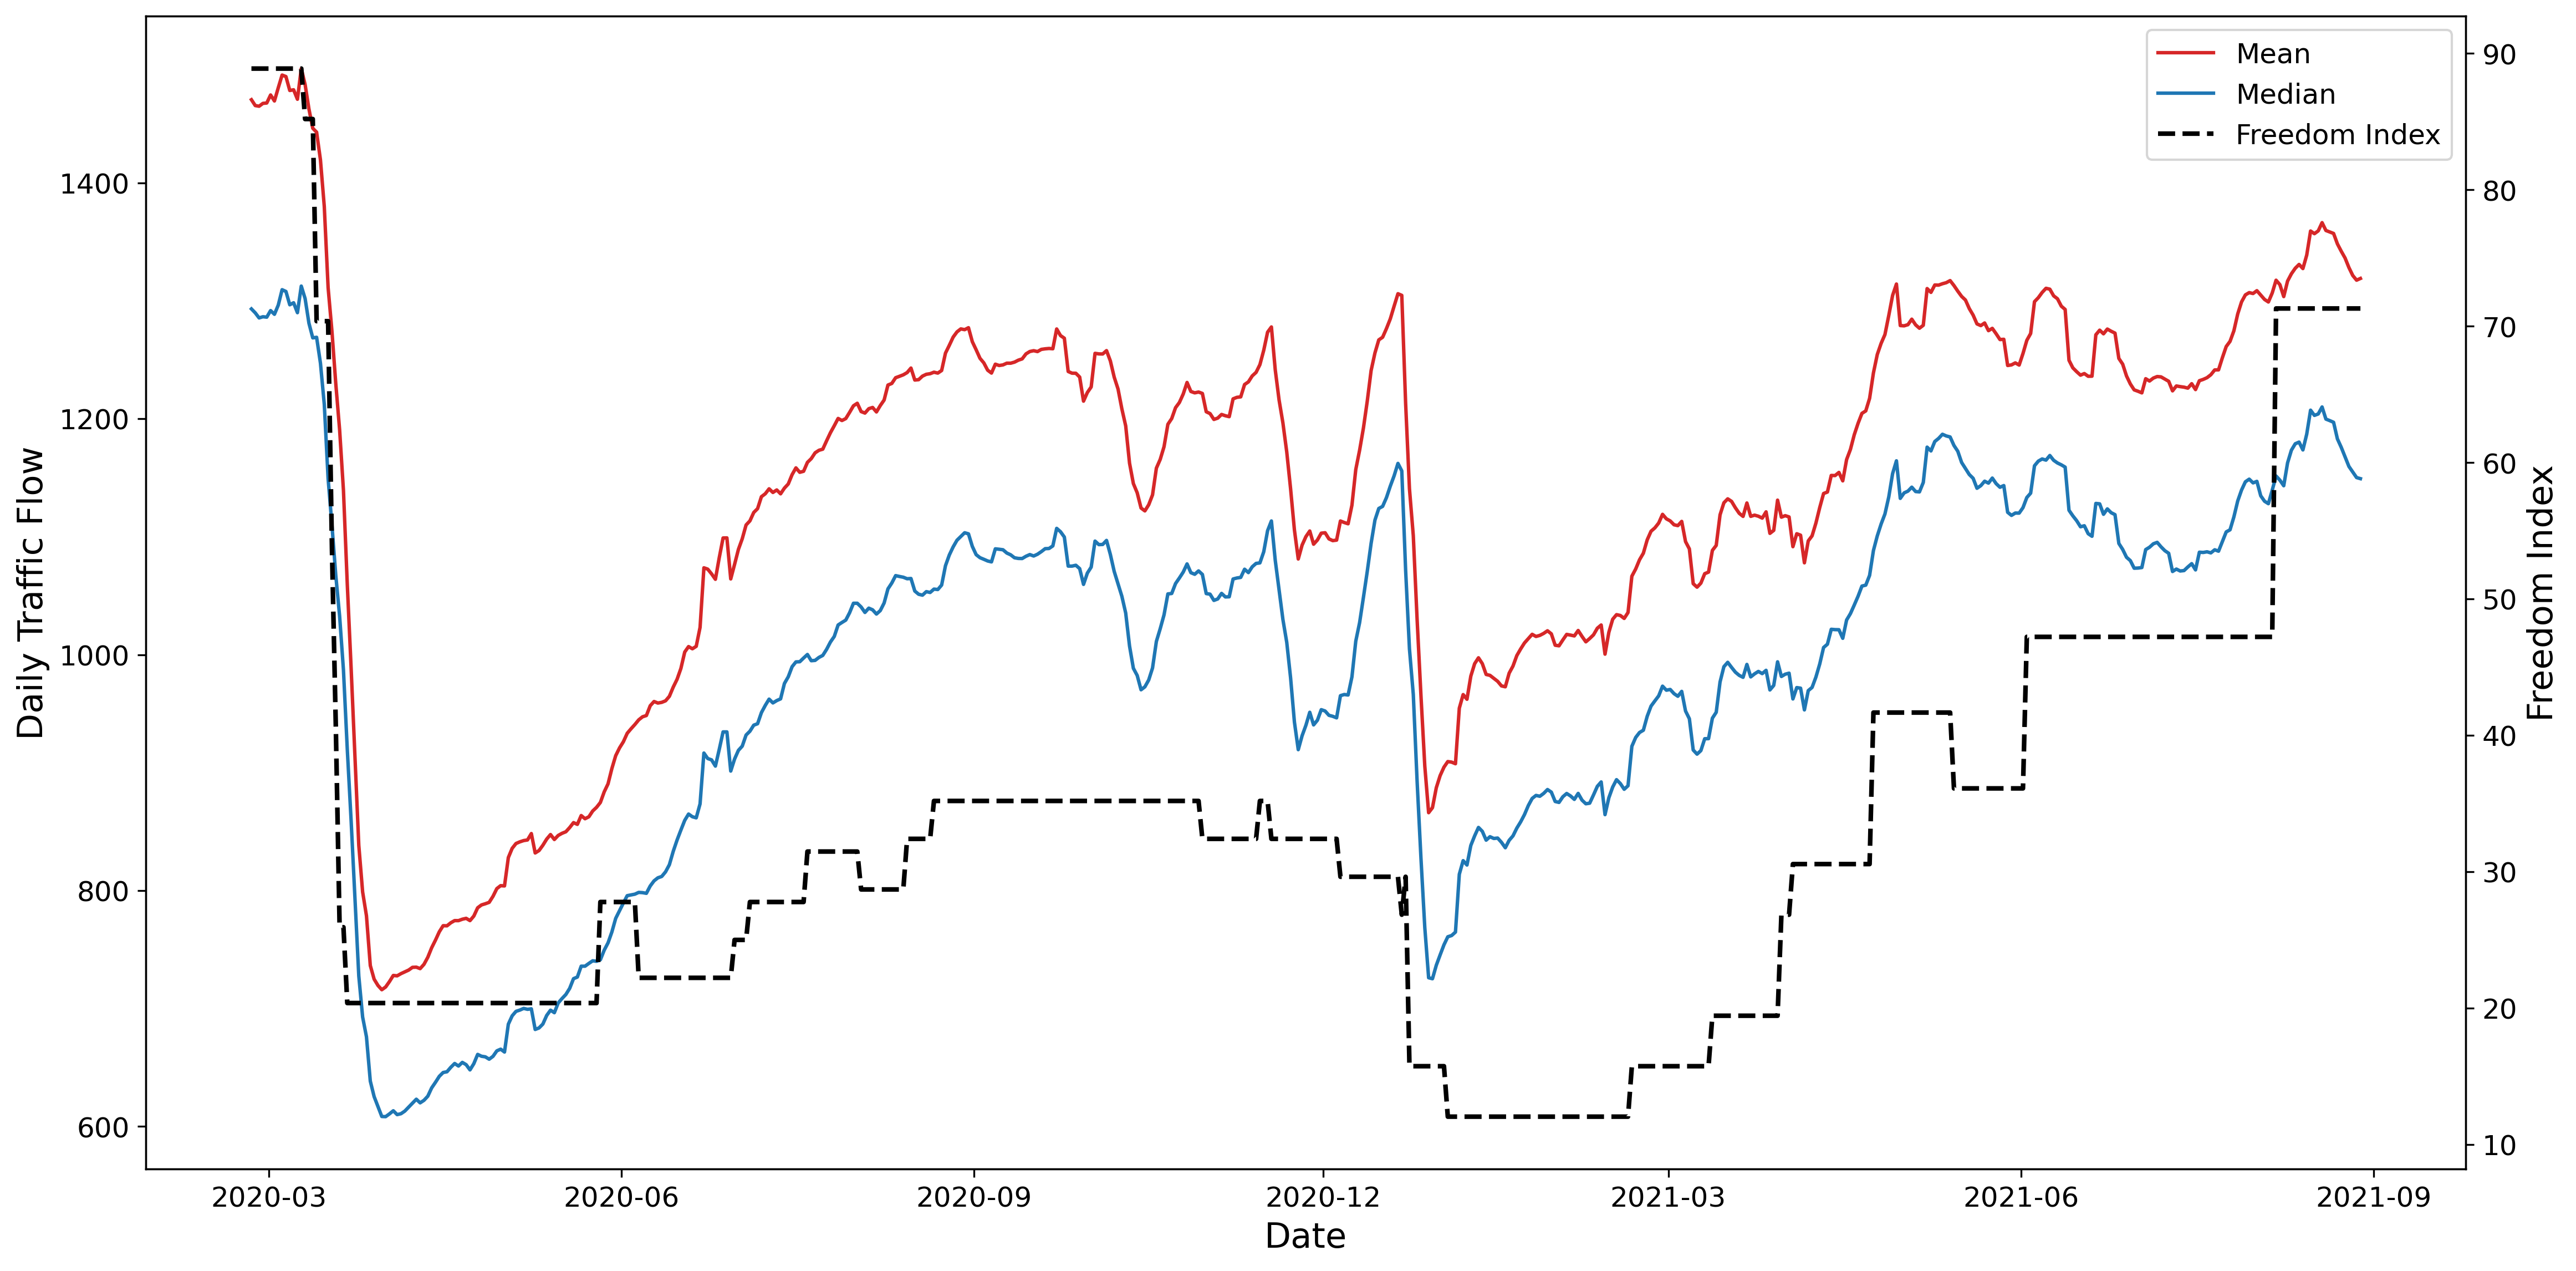

In [21]:
# Create a frame for plot
fig, ax2 = plt.subplots(figsize=(18, 9),dpi=300)

# Plot
f2 = ax2.plot(covid_flow_corr['mean_7'], linestyle='-', label='Mean', color='tab:red', alpha=1)
f3 = ax2.plot(covid_flow_corr['median_7'], linestyle='-', label='Median', color='tab:blue', alpha=1)
ax3 = ax2.twinx()
f1 = ax3.plot(covid_flow_corr['StringencyIndex_Average'], linestyle='--', label='Freedom Index',
              color='black', alpha=1, linewidth=2)

ax2.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=3)))

# show legend 
fs = f2+f3+f1
labs = [l.get_label() for l in fs]
ax2.legend(fs, labs, loc='upper right', fontsize=12)

# set x and y label
ax2.set_xlabel('Date',fontsize=15)
ax2.set_ylabel('Daily Traffic Flow',fontsize=15)
ax3.set_ylabel('Freedom Index',fontsize=15)

# set ticks size of two axis
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)



plt.savefig('../../../publication/from Yue/Data paper/figure/flow and freedom index.png')

plt.show()

#### Calculate correlation between traffic flow and stringency index

In [22]:
from scipy.stats import pearsonr, spearmanr
p_corr = pearsonr(covid_flow_corr['StringencyIndex_Average'], covid_flow_corr['mean_7'])[0]
p_corr_p = pearsonr(covid_flow_corr['StringencyIndex_Average'], covid_flow_corr['mean_7'])[1]

s_corr = spearmanr(covid_flow_corr['StringencyIndex_Average'], covid_flow_corr['mean_7'])[0]
s_corr_p = spearmanr(covid_flow_corr['StringencyIndex_Average'], covid_flow_corr['mean_7'])[1]

pd.DataFrame([[p_corr, p_corr_p], [s_corr, s_corr_p]], index=["Pearson", "Spearman"], columns=["coefficient", "p_value"])

coefficient        p_value
Pearson      0.750961  5.134181e-101
Spearman     0.861042  2.326093e-163

### 6. Make spatial plot of daily average traffic flow for COVID-19 stages